In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mayowa91","key":"56858a68294c16c5f32dd227897ae4e2"}'}

In [ ]:
import os, shutil

# Make sure the .kaggle directory exists
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the uploaded file to the correct path
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set proper permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

# Verify
!ls -la /root/.kaggle
!cat /root/.kaggle/kaggle.json


total 16
drwxr-xr-x 2 root root 4096 Dec  5 09:29 .
drwx------ 1 root root 4096 Dec  5 09:28 ..
---x-wx--T 1 root root   64 Dec  5 09:28 kaggle.json
{"username":"mayowa91","key":"56858a68294c16c5f32dd227897ae4e2"}

In [ ]:
!kaggle datasets download -d "raj713335/tbo-hotels-dataset"


Dataset URL: https://www.kaggle.com/datasets/raj713335/tbo-hotels-dataset
License(s): MIT
 94% 373M/395M [00:06<00:00, 57.4MB/s]
100% 395M/395M [00:06<00:00, 60.0MB/s]


In [ ]:
!unzip tbo-hotels-dataset.zip


Archive:  tbo-hotels-dataset.zip
  inflating: hotels.csv              


In [3]:
import pandas as pd

In [ ]:
!pip install chardet
import chardet

# detect encoding by reading a small chunk
rawdata = open('/content/hotels.csv', 'rb').read(200000)
result = chardet.detect(rawdata)
print(result)


{'encoding': 'Windows-1252', 'confidence': 0.7299223065773336, 'language': ''}


In [4]:
 df = pd.read_csv('/content/hotels.csv', encoding='Windows-1252', low_memory=False)


In [5]:
df.head(5)

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,42268822,Private parking Parking onsite Television in c...,41.32213|19.81665,00355 4226 5009,1000,https://www.booking.com/hotel/al/de-paris.html
1,AL,Albania,106078,Albanien,1003301,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",35548520058,airport pick up wifi available in all areas Ai...,41.30413|19.74703,+35548520057,1041,https://www.booking.com/hotel/al/hotel-green.html
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,NaN,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,NaN,1001,http://www.hotelseven-tirana.com/
4,AL,Albania,106078,Albanien,1003325,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,+355695406986,internet services Ironing service Family rooms...,41.29125|19.85349,355 69 5406986,1000,https://www.booking.com/hotel/al/viktoria-sauk...


In [6]:
df.isnull().sum()

,0
countyCode,912
countyName,0
cityCode,0
cityName,0
HotelCode,0
HotelName,0
HotelRating,0
Address,102
Attractions,525092
Description,47005


In [7]:
df.columns.tolist()


['countyCode',
 ' countyName',
 ' cityCode',
 ' cityName',
 ' HotelCode',
 ' HotelName',
 ' HotelRating',
 ' Address',
 ' Attractions',
 ' Description',
 ' FaxNumber',
 ' HotelFacilities',
 ' Map',
 ' PhoneNumber',
 ' PinCode',
 ' HotelWebsiteUrl']

In [8]:
df.columns = df.columns.str.strip()


In [9]:
df['countyName'].unique()

array(['Albania', 'Andorra', 'Antigua', 'Argentina', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       'Belarus', 'Belgium', 'Bolivia', 'Bosnia Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'French Polynesia', 'Germany',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland(Republic of)', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Laos', 'Latvia', 'Lebanon',
       'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macau',
       'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia',
       'Morocco', 'My

In [26]:
df[df['countyName'] == 'Nigeria']


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
571401,NG,Nigeria,149259,Abakaliki,1628990,Pinnacle Hotels And Suites,ThreeStar,68 Enugu Road Abakaliki Abakaliki,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Abakaliki Township Stadium<...,234-081-63499747,Dry cleaning/laundry service Concierge service...,6.334208|8.096124,234-081-38925052,NaN,NaN
571402,NG,Nigeria,100550,Abeokuta,1192348,Park Inn by Radisson Abeokuta,FourStar,Ibrahim Babangida Boulevard Kuto Kuto Kuto Rou...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near June 12 Cultural Center</p>...,234-813-9860049,Free reception No single-use plastic straws No...,7.134703|3.351008,234-813-9860020,+234039,https://www.parkinn.com/hotel-abeokuta
571403,NG,Nigeria,100550,Abeokuta,1502470,Richton Hotel & Suites,ThreeStar,62 64 Edun Adila Street Ibara Housing Estate I...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Oke-Ilewo Mosque</p><p>Loca...,234-81-45239140,Dry cleaning/laundry service Fully fenced Conf...,7.120919|3.343563,234-80-23513455,2342,http://richtonhotel.com
571404,NG,Nigeria,100550,Abeokuta,1700918,Indices Hotel and Garden,ThreeStar,1 5 Safari Junction Onikolobo Safari JunctionA...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : In Abeokuta</p><p>Location : Loc...,234-803-2118481,Dry cleaning/laundry service Pool umbrellas Mu...,7.15178|3.38029,234-803-2118481,23401,http://www.trivago.com/en/abeokuta-86126/hotel...
571405,NG,Nigeria,100550,Abeokuta,1747006,Dusmar Hotels by AirFusion,All,Presidential Boulevard Kuto Abeokuta,NaN,"Located in Abeokuta, Dusmar Hotels by AirFusio...",NaN,Free self parking Restaurant Room service Bar/...,7.13775|3.3522,NaN,NaN,https://www.booking.com/hotel/ng/dusmar-hotels...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573137,NG,Nigeria,141646,Warri,1638981,The Mulberry Hotel,ThreeStar,Brighton Place Off Airport Road Opposite Gtban...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Efferun Market</p><p>Locati...,44-744-8836864,Safe-deposit box at front desk Bar/lounge Rest...,5.547014|5.771767,234-90-82032442,NaN,NaN
573138,NG,Nigeria,141646,Warri,1661137,Peemos Place Warri,ThreeStar,5 Emaye Lane Warri Gra Warri GraWarri,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Hussey College</p><p>Locati...,234-81-75990227,Ballroom Reception hall Number of meeting room...,5.516042|5.743359,2348175990227,NaN,NaN
573139,NG,Nigeria,141646,Warri,1757401,Oduah Hotel & Suites,All,B11 Iffie Layout Off Refinery Road EkpanWarriD...,NaN,"Situated in Warri, Oduah Hotel & Suites offers...",NaN,Free self parking Restaurant Room service Bar/...,5.56916|5.73052,NaN,NaN,https://www.booking.com/hotel/ng/oduah-amp-sui...
573140,NG,Nigeria,141646,Warri,1770161,The Bridgeview Hotel,All,1-3 Ada Val Arenyeka Street By Ogunu Fly-OverU...,NaN,It is located in the heart of warri with acces...,NaN,Free self parking Restaurant Room service Meet...,5.52935|5.71844,NaN,320242,https://www.booking.com/hotel/ng/the-bridgevie...


In [27]:
df = df.drop(columns=["countyCode"])


In [28]:
df.shape

(1010033, 15)

In [10]:
african_countries = [
    'Nigeria','Cameroon','Morocco', 'Tanzania','Senegal','Zambia'

]
df_africa = df[df['countyName'].isin(african_countries)].copy()


In [11]:
df_africa.shape


(9106, 16)

In [12]:
!pip install langchain==0.3.27 langchain-core==0.3.72 langchain-text-splitters==0.3.9 langchain-openai==0.2.12 langchain-community==0.3.26

KeyboardInterrupt: 

In [ ]:

!pip install -U langgraph

  Using cached langgraph-1.0.4-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_core-1.1.1-py3-none-any.whl.metadata (3.7 kB)
Using cached langgraph-1.0.4-py3-none-any.whl (157 kB)
Using cached langchain_core-1.1.1-py3-none-any.whl (475 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.8/411.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.2.11
    Uninstalling langsmith-0.2.11:
      Successfully uninstalled langsmith-0.2.11
  Attempting uninstall: langgraph-sdk
    Found existing installation: langgraph-sdk 0.1.74
    Uninstalling langgraph-sdk-0.1.74:
      Successfully uninstalled langgraph-sdk-0.1.74
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.28
    Uninstalling langchain-core-0.3.28:
      Successfully uninstalled langchain-core-0.3.28
  Attempting uninstall: langgraph
    Found existing

In [13]:

from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationalRetrievalChain

from langchain.text_splitter import RecursiveCharacterTextSplitter

In [14]:
from openai import OpenAI
import os
from google.colab import userdata
from langchain_openai import ChatOpenAI

openai_api_key = userdata.get('OPENAI_API_KEY')

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    api_key=openai_api_key
)


In [15]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_community.vectorstores import FAISS

from langchain_core.prompts import ChatPromptTemplate

print("✅ All imports successful!")

✅ All imports successful!


In [16]:
from openai import OpenAI
import os
from google.colab import userdata
from langchain_openai import ChatOpenAI

openai_api_key = userdata.get('OPENAI_API_KEY')

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    api_key=openai_api_key
)


In [17]:
def row_to_text(row):
    return f"""
Hotel Name: {row['HotelName']}
City: {row['cityName']}
Country: {row['countyName']}
Rating: {row['HotelRating']}
Address: {row['Address'] if pd.notna(row['Address']) else 'None'}
Phone: {row['PhoneNumber'] if pd.notna(row['PhoneNumber']) else 'None'}
Fax: {row['FaxNumber'] if pd.notna(row['FaxNumber']) else 'None'}
HotelCode: {row['HotelCode']}
Facilities: {row['HotelFacilities'] if pd.notna(row['HotelFacilities']) else 'None'}
Description: {row['Description'] if pd.notna(row['Description']) else 'None'}
Attractions: {row['Attractions'] if pd.notna(row['Attractions']) else 'None'}
Website: {row['HotelWebsiteUrl'] if pd.notna(row['HotelWebsiteUrl']) else 'None'}
Map: {row['Map'] if pd.notna(row['Map']) else 'None'}
"""


In [18]:
from langchain.schema import Document

docs = [Document(page_content=row_to_text(row), metadata=row.to_dict())
        for idx, row in df_africa.iterrows()]



In [19]:
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
all_chunks = []

for doc in docs:
    chunks = splitter.split_text(doc.page_content)
    # keep original metadata for each chunk
    for c in chunks:
        all_chunks.append(Document(page_content=c, metadata=doc.metadata))



In [20]:
!pip install faiss-cpu

In [21]:


from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS

emb = OpenAIEmbeddings(model="text-embedding-3-small", openai_api_key=openai_api_key)
vectorstore = FAISS.from_documents(all_chunks, emb)
retriever = vectorstore.as_retriever()



In [22]:
# set up the conversation memory for the chat
memory = ConversationBufferMemory(memory_key='chat_history', return_messages=True)

rag_chain = ConversationalRetrievalChain.from_llm(llm=llm, retriever=retriever, memory=memory)

/tmp/ipython-input-3377874168.py:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key='chat_history', return_messages=True)


In [23]:
from langchain.prompts import PromptTemplate

unified_prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=(
        "You are an expert hotel assistant for hotels in african countries"
        "Nigeria,Morocco,Tanzania,Senegal,Zambia. Your job is to help users find hotels, "
        "provide information about the hotel, make comparisons, and give recommendations based on their needs.\n\n"

        "CAPABILITIES:\n"
        "1. Provide contact details (address, phone, fax, website)\n "
        "2. Recommend hotels based on requirements (facilities, location, rating)\n"
        "3. Compare multiple hotels on features, facilities, and location\n"
        "4. Answer questions about hotel facilities and services\n"
        "5. Suggest hotels near specific attractions or areas\n\n"

        "INSTRUCTIONS:\n"
        "- Use ALL available information from the context\n"
        "- For contact queries: provide address, phone, fax (if available), and website\n"
        "- For recommendations: match user requirements with hotel facilities and rating\n"
        "- For comparisons: highlight key differences in facilities, location, and features\n"
        "- For facility questions: look in the HotelFacilities field\n"
        "- Be specific and include hotel names, ratings, and relevant details\n"
        "- If information is not available, say so clearly\n\n"

        "Context:\n{context}\n\n"
        "User Question: {question}\n\n"
        "Answer:"
    )
)


rag_chain = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=retriever,
    memory=memory,
    combine_docs_chain_kwargs={"prompt": unified_prompt}
)

In [24]:
query = "what five star hotel in lagos do you recommend for someone with 5 kids?"
result = rag_chain.invoke({"question": query})
print(result["answer"])

For a family with five kids looking for a five-star hotel in Lagos, I recommend the **Lagos Oriental Hotel**. Here are the details:

### Lagos Oriental Hotel
- **Rating:** Five Star
- **Address:** 3 Maroko Road, Lekki, Victoria Island, Lagos
- **Phone:** 254-789-300000
- **Fax:** 254-733-280000
- **Facilities:**
  - Free breakfast
  - Outdoor pool (great for kids)
  - 24-hour front desk
  - Business center
  - Free WiFi
  - Fitness facilities
  - Accessible bathroom (in select rooms)
  - Concierge services
  - Designated smoking areas
  - ATM/banking
  - Terrace

The hotel offers a range of family-friendly amenities, including an outdoor pool where kids can play and a variety of dining options. The spacious rooms and facilities make it suitable for families. 

If you need more information or have specific requirements, feel free to ask!


In [25]:
!pip install google-search-results

In [26]:
from google.colab import userdata
from serpapi import GoogleSearch
import os

API_KEY = userdata.get("SERPAPI_API_KEY")


In [27]:
def search_phone_number(query):
    params = {
        "engine": "google",
        "q": query,
        "api_key": API_KEY,
        "num": "10"
    }
    search = GoogleSearch(params)
    results = search.get_dict()

    if "knowledge_graph" in results:
        kg = results["knowledge_graph"]
        if "phone" in kg:
            return kg["phone"]
        if "customer_service" in kg:
            return kg["customer_service"]

    if "local_results" in results:
        for result in results["local_results"]:
            if "phone" in result:
                return result["phone"]

    if "organic_results" in results:
        for result in results["organic_results"][:5]:
            snippet = result.get("snippet", "")
            if any(keyword in snippet.lower() for keyword in ["phone", "tel", "call", "+234"]):
                return snippet

    return "Not found"

query = "rockview hotel Lagos phone number"
phone_number = search_phone_number(query)
print(phone_number)

Send us a WhatsApp message: 0817234 2192 Call us: 09060824114 | 09168688223 | 09164826958 Location: Plot 33, 23 Road, 2nd Avenue, Festac Town, Lagos ...


In [28]:
from langgraph.graph import StateGraph, END
from typing import TypedDict

class HotelAgentState(TypedDict):
    query: str
    rag_answer: str
    final_answer: str



In [29]:
def rag_node(state: HotelAgentState):
    """Get answer from hotel dataset using RAG chain"""
    query = state["query"]
    result = rag_chain.invoke({"question": query})
    answer = result["answer"]

    return {
        "query": query,
        "rag_answer": answer,
        "final_answer": answer
    }



In [30]:
def should_search_online(state: HotelAgentState) -> str:
    """Decide if there is need to search for phone number online"""
    query = state["query"].lower()
    answer = state["rag_answer"].lower()

    asking_for_contact = any(word in query for word in
                            ["phone", "contact", "call", "number", "reach", "telephone"])


    has_phone = ("+234" in state["rag_answer"] or
                 "phone:" in answer or
                 "tel:" in answer)


    phone_unavailable = any(phrase in answer for phrase in
                           ["not available", "no phone", "not found", "nan"])

    # Search online only if user wants phone AND (phone is missing OR unavailable)
    if asking_for_contact and (not has_phone or phone_unavailable):
        return "search_online"
    else:
        return "finish"


In [31]:

def search_online_node(state: HotelAgentState):
    """Search for phone number online using SerpAPI"""
    query = state["query"]

    search_query = f"{query} Nigeria contact phone"
    phone_result = search_phone_number(search_query)

    # Combine RAG answer with online search result
    if phone_result != "Not found":
        enhanced_answer = (
            f"{state['rag_answer']}\n\n"
            f" Additional Contact Information (from online search):\n"
            f"{phone_result}"
        )
    else:
        enhanced_answer = (
            f"{state['rag_answer']}\n\n"
            f" Unable to find additional contact information online."
        )

    return {
        "query": state["query"],
        "rag_answer": state["rag_answer"],
        "final_answer": enhanced_answer
    }

In [37]:
def finish_node(state: HotelAgentState):
    """No changes needed, just return final answer"""
    return state

# Step 6: Build the LangGraph Workflow
workflow = StateGraph(HotelAgentState)

# Add all nodes
workflow.add_node("rag", rag_node)
workflow.add_node("search_online", search_online_node)
workflow.add_node("finish", finish_node)

workflow.set_entry_point("rag")

workflow.add_conditional_edges(
    "rag",
    should_search_online,
    {
        "search_online": "search_online",
        "finish": "finish"
    }
)
workflow.add_edge("search_online", END)
workflow.add_edge("finish", END)

hotel_agent = workflow.compile()

print("✅ Hotel Agent with LangGraph created successfully!")

✅ Hotel Agent with LangGraph created successfully!


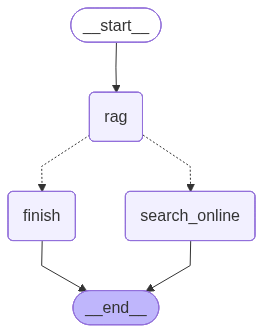

In [38]:
# Visualize the graph
from IPython.display import Image, display
display(Image(hotel_agent.get_graph().draw_mermaid_png()))

In [39]:
def ask_hotel_agent(question: str) -> str:
    """
    Ask the hotel agent a question

    Args:
        question: User's question about hotels

    Returns:
        Final answer from the agent
    """
    result = hotel_agent.invoke({
        "query": question,
        "rag_answer": "",
        "final_answer": ""
    })

    return result["final_answer"]

In [41]:
import gradio as gr

def chat_with_agent(message, history):

    try:
        response = ask_hotel_agent(message)
        return response
    except Exception as e:
        return f"Sorry, I encountered an error: {str(e)}"


demo = gr.ChatInterface(
    fn=chat_with_agent,
    title=" Africa Hotel Assistant",
    description="Ask me anything about hotels in Africa! I can help with recommendations, contact information, facilities,rating and more.",
    theme=gr.themes.Soft()
)


demo.launch(share=True)

/usr/local/lib/python3.12/dist-packages/gradio/chat_interface.py:347: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9e75ec01817699cb46.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
